# Client Exploratory Fraud Data Analysis (Ghamy016)

In [2]:
# Loading Python libraries
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to read pickle files
import pickle


# Loading the Data

In [3]:
# Loading Data (4 files as dataframes)

# function for laoding pickle files
def loadObject(name):
    try:
        with open(name, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        print('Could not find file "{}"". Please check it exists inc. the file extension'.format(str(name)))

# using function to load pickle files
myObject = loadObject('chatEmbeddings_2019-08-14-165706.pkl')
myObject1 = loadObject('transactionEmbeddings_2019-08-14-165704.pkl')

# Reading metadata and clickstream csv files 

metadata_df = pd.read_csv('TicTocUniSaAppMetadata_2019-08-14.csv')
clickstream_df = pd.read_csv('TicTocUniSaClickStream_2019-08-14.csv')


# converting files to data frames for EDA and further analysis
chat_df = pd.DataFrame(myObject)
transaction_df = pd.DataFrame(myObject1)




 Four Files successfully loaded up until this point

# General EDA

## Size of Data

In [4]:

print('Size of application metadata', metadata_df.shape)
print('Size of clickstream data', clickstream_df.shape)
print('Size of transaction_embeddings data', transaction_df.shape)
print('Size of chat_embeddings data', chat_df.shape)

Size of application metadata (2633, 13)
Size of clickstream data (2491, 9)
Size of transaction_embeddings data (607087, 9)
Size of chat_embeddings data (24104, 9)


## Variable Data Type Counts for each file

In [92]:
# Number of categorical, numeric attributes in each file
print('metadata\n',metadata_df.dtypes.value_counts())
print('transaction\n',transaction_df.dtypes.value_counts())
print('chat\n',chat_df.dtypes.value_counts())
print('clickstream\n',clickstream_df.dtypes.value_counts())


metadata
 object            8
float64           2
datetime64[ns]    2
int64             1
int16             1
dtype: int64
transaction
 object     8
float64    1
dtype: int64
chat
 object     8
float64    1
dtype: int64
clickstream
 object    6
int64     3
dtype: int64


## Glimpse of Data

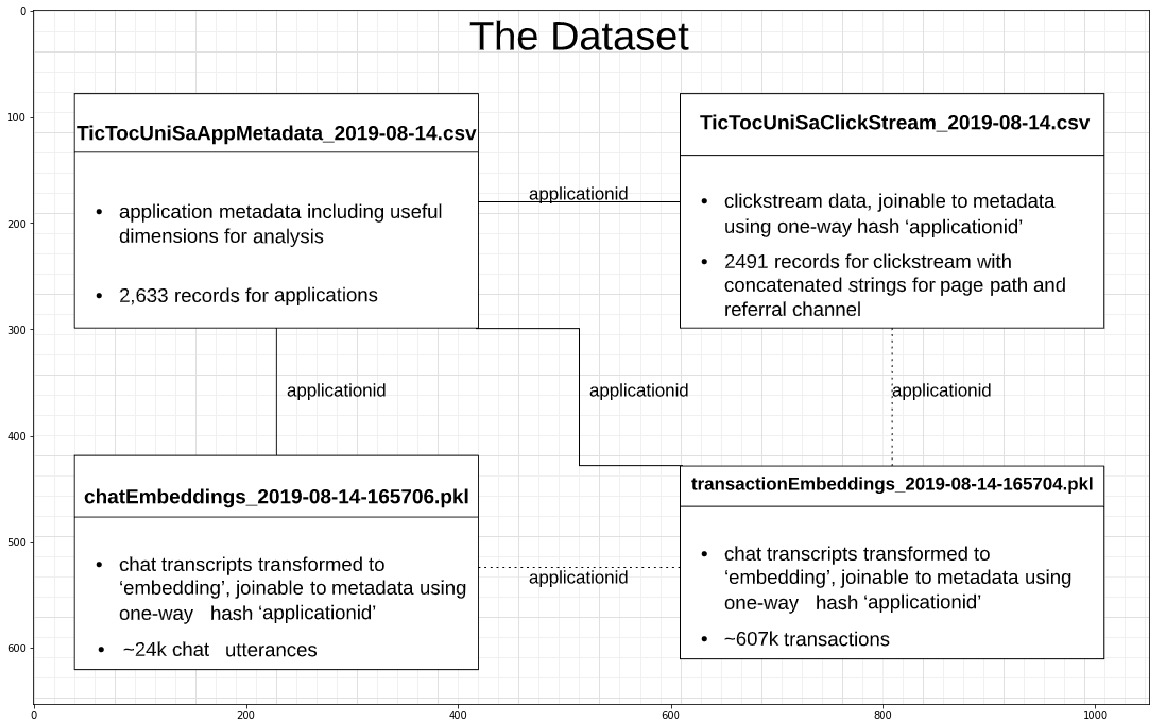

In [6]:
import matplotlib.image as mpimg
image = mpimg.imread("Capture.png")
plt.figure(figsize = (20,16))
plt.imshow(image)
plt.show()

metadata_df.head()


In [7]:
metadata_df.columns.values

array(['applicationid', 'createdon', 'outcomeon', 'status',
       'propertystate', 'loanpurpose', 'repaymenttype', 'loanusage',
       'ratetype', 'loanamount', 'loantovalueratio', 'applicationtype',
       'agecreatedon'], dtype=object)

In [8]:
chat_df.head()

,applicationid,chatEmbedding,chatid,chatstarton,rating,sentiment_compound,status,user_type,utteranceid
0,0e730e97f5e23f177468cc459acb888c0ceb461eed15cb...,"[[0.012461126, 0.026670266, 0.0038820878, 0.04...",e0375487b152725bfb21b96876b260a5de52bfd69018ba...,2017-08-08,not_rated,0.0000,declined,visitor,8bd6b80d2aa9d4bab974b34ba0319c8cd73ec2441fb25d...
1,0e730e97f5e23f177468cc459acb888c0ceb461eed15cb...,"[[0.012461126, 0.026670266, 0.0038820878, 0.04...",e0375487b152725bfb21b96876b260a5de52bfd69018ba...,2017-08-08,not_rated,0.0000,declined,visitor,851ec87283eaffc8375c0bf42c7b38d95707a27ebdaf05...
2,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[-0.015632771, 0.0395712, -0.021834029, -0.04...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.2263,declined,visitor,0514e95a2ca7e0c14eb862d4a3ef7810eda207dedeb60c...
3,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[0.04322845, 0.023193743, -0.014702667, -0.04...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.0000,declined,visitor,f8e218879ec6a557ccc8905a5617ac191facfd0945aafe...
4,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[0.013008025, 0.0027834661, 0.04260392, -0.01...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.4019,declined,visitor,4b55bbd6c7cf7a68b2048e75dd304a361d5092743a5145...


In [9]:
chat_df.columns.values

array(['applicationid', 'chatEmbedding', 'chatid', 'chatstarton',
       'rating', 'sentiment_compound', 'status', 'user_type',
       'utteranceid'], dtype=object)

In [10]:
transaction_df.head()

,accountid,applicationid,financialinstitution,status,transactionEmbedding,transactionamount,transactioncategory,transactionposteddate,txnid
0,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.039921653, 0.0076719522, -0.02605666, -0.0...",180.00,IncomeSalaryRegularIncome,2018-06-18,ea8b12252c4b3e6c85b5fb29cb4d02d1252cf54df38fcd...
1,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.039921653, 0.0076719522, -0.02605666, -0.0...",174.00,IncomeSalaryRegularIncome,2018-06-04,68aad105bc429721b1cd8c7dc70acbaaca06d99e66486f...
2,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.0037002675, -0.032413684, 0.02330419, 0.00...",-1695.68,TransferTransfers,2018-06-01,b4ff9d37964cd9f73a0ca4ff9c702cd261f3d6e2b2d052...
3,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[-0.044274665, -0.030233014, -0.030928208, -0...",10264.00,IncomeOtherIncome,2018-05-22,dccdd51da721e751df8ce0ad77971ba97fbe6a39f762d8...
4,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[-0.023104716, -0.030675078, -0.017270565, 0....",-41.43,TransferSecuritiesTrades,2018-05-21,f29a19b4120787ce8cc90be800f0f6d62cc9180c31c293...


In [11]:
transaction_df.columns.values

array(['accountid', 'applicationid', 'financialinstitution', 'status',
       'transactionEmbedding', 'transactionamount', 'transactioncategory',
       'transactionposteddate', 'txnid'], dtype=object)

In [12]:
clickstream_df.head()

,applicationid,createdon,lastsession,firstsession,sessioncount,visitdays,daysjourney,pagepathdistinct,conversionpath
0,9fb1fc0e2cf41ec8a1dd0debd300e9d4fe82f39b8fa083...,2019-01-05,2019-01-05,2019-01-05,4,1,0,Home | Tic:Toc - The World's First Instant Hom...,PaidSearch > Affiliates > Affiliates
1,3d4dbe46d23415a8682751f2ee59817b29d334d360c5ef...,2019-01-09,2019-01-09,2019-01-09,3,1,0,Home | Tic:Toc - The World's First Instant Hom...,Direct > Direct > SaveResume
2,244ad26fe7978ebbc422181342c3af869222e6722a645f...,2018-11-10,2018-11-10,2018-11-09,3,2,1,Home | Tic:Toc - The World's First Instant Hom...,OrganicSearch > OrganicSearch > OrganicSearch ...
3,244ad26fe7978ebbc422181342c3af869222e6722a645f...,2018-11-10,2018-11-10,2018-11-09,3,2,1,Home | Tic:Toc - The World's First Instant Hom...,OrganicSearch > OrganicSearch > OrganicSearch
4,3f780ce0ab43c050d5ba323f91593abf94dab8bec13e80...,2018-11-13,2018-11-13,2018-11-13,1,1,0,Tic:Toc - World's first instant home loan,Direct


In [13]:
clickstream_df.columns.values

array(['applicationid', 'createdon', 'lastsession', 'firstsession',
       'sessioncount', 'visitdays', 'daysjourney', 'pagepathdistinct',
       'conversionpath'], dtype=object)

## Missing Values Information

In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing_metadata_df = missing_values_table(metadata_df)
missing_metadata_df

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
loantovalueratio,111,4.2
applicationtype,8,0.3
agecreatedon,5,0.2


In [16]:
missing_transaction_df = missing_values_table(transaction_df)
missing_transaction_df

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [17]:
missing_clickstream_df = missing_values_table(clickstream_df)
missing_clickstream_df

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
missing_chat_df = missing_values_table(chat_df)
missing_chat_df

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Note: Only metedata dataframe contains missing values in 3 columns listed above

## Checking Data Imbalance

### Class Imbalance in Application Metadata

declined     1788
converted     640
withdrawn     205
Name: status, dtype: int64


Text(0.5,1,'Class Distribution in Application Metadata')

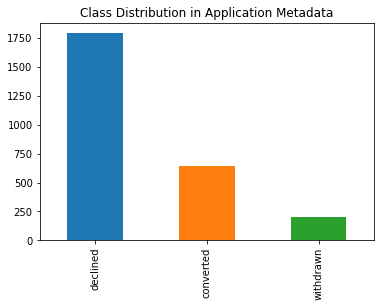

In [19]:
print(metadata_df['status'].value_counts())
metadata_df['status'].value_counts().plot(kind='bar'); plt.title('Class Distribution in Application Metadata')


### Class Imbalance in Transaction Data File

declined     415035
converted    155659
withdrawn     36393
Name: status, dtype: int64


Text(0.5,1,'Target Class in Transaction File')

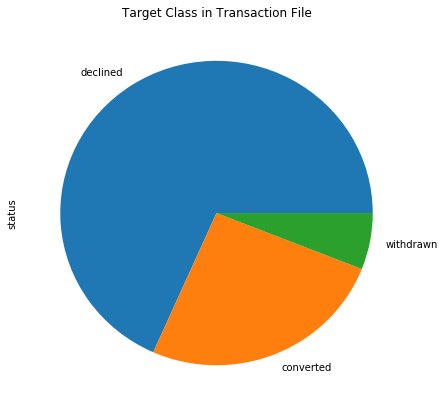

In [20]:
print(transaction_df['status'].value_counts())
plt.figure(figsize=(7,7))
transaction_df['status'].value_counts().plot(kind='pie');plt.title('Target Class in Transaction File')

### Class Imbalance in Chat Data File

converted    11097
declined     10401
withdrawn     2606
Name: status, dtype: int64


Text(0.5,1,'Target Class in Chat Embedding File')

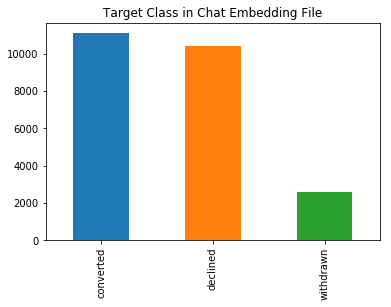

In [21]:
print(chat_df['status'].value_counts())
chat_df['status'].value_counts().plot(kind='bar');plt.title('Target Class in Chat Embedding File')


#### Note:
In chat data file, converted applications are higher in number than declined and withdrawn.

### Note: "status" variable does not exist in Clickstream dataframe and is present with above stated levels in all other data frames.

### Class Imbalance by Inner Join all files grouped by Application ID

#### Data Merging (Inner Join)

In [102]:
meta_click_df = pd.merge(metadata_df,clickstream_df, how = 'inner', on = 'applicationid')
meta_click_chat_df= pd.merge(meta_click_df,chat_df,how = 'inner', on = 'applicationid')
meta_click_chat_trans_df = pd.merge(meta_click_chat_df, transaction_df, how = 'inner', on = 'applicationid')

In [101]:
meta_click_chat_trans_df.shape

(10153463, 38)

status
converted    108
declined     203
withdrawn     27
Name: applicationid, dtype: int64


Text(0.5,1,'Target Class grouped by & inner Joined by Application ID ')

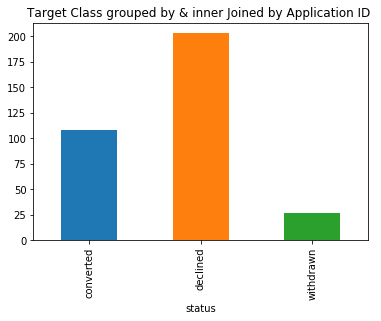

In [23]:
Class_by_Application_id = meta_click_chat_trans_df.groupby('status')['applicationid'].nunique()
print(Class_by_Application_id)
Class_by_Application_id.plot(kind = 'bar');plt.title('Target Class grouped by & inner Joined by Application ID ')


## Number of unique levels (categories) in each object (categorical) column of each file


In [24]:
metadata_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

applicationid      2584
createdon           362
outcomeon           380
status                3
propertystate         8
loanpurpose           2
repaymenttype         2
loanusage             2
ratetype              2
applicationtype       2
dtype: int64

In [25]:
clickstream_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

applicationid       1636
createdon            316
lastsession          317
firstsession         358
pagepathdistinct     687
conversionpath       670
dtype: int64

# Extensive EDA (Individual Data Files Exploration)

## Application Metadata

In [26]:
print('Descriptive Stats of numeric attributes in metadata')
metadata_df.select_dtypes(exclude=['object']).describe()

Descriptive Stats of numeric attributes in metadata


,loanamount,loantovalueratio,agecreatedon
count,2.633000e+03,2522.000000,2628.000000
mean,4.534325e+05,0.653057,41.470700
std,2.693549e+05,0.174926,10.100122
min,5.013400e+04,0.051100,18.000000
25%,2.786780e+05,0.562300,34.000000
50%,3.974560e+05,0.709950,40.000000
75%,5.467330e+05,0.791875,48.000000
max,2.075973e+06,1.257200,77.000000


Text(0.5,1,'Histogram of Loan Amount')

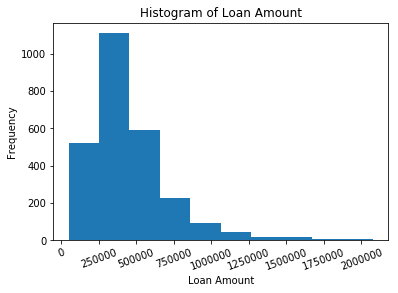

In [27]:
metadata_df['loanamount'].plot.hist();plt.xlabel('Loan Amount');plt.ylabel('Frequency');plt.xticks(rotation = 20);plt.title('Histogram of Loan Amount')

#### Note: 
1. The standard deviation around mean (4.5 lac) is around 2 lac dollars. 
2. Loan amounts requested higher than 10 lac dollars seem unrealistic.
3. Very less loan amounts requested between 10 lac and 20 lac dollars.




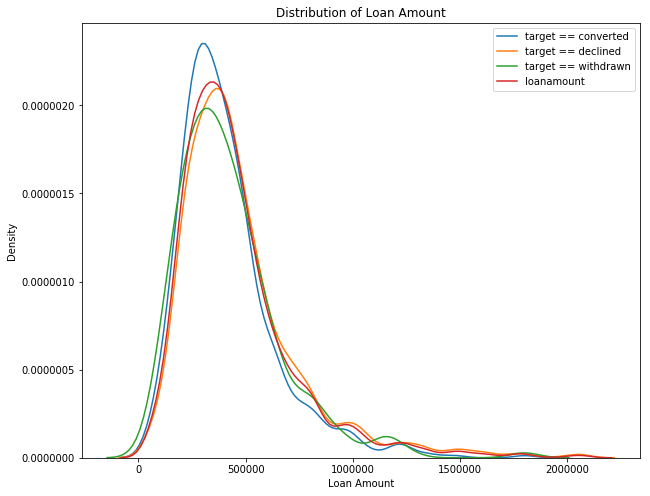

In [28]:
plt.figure(figsize = (10, 8))
# KDE plot of loans applications converted
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'converted', 'loanamount'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'declined', 'loanamount'] , label = 'target == declined')
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'withdrawn', 'loanamount'] , label = 'target == withdrawn')
sns.kdeplot(metadata_df['loanamount'])
# Labeling of plot
plt.xlabel('Loan Amount'); plt.ylabel('Density'); plt.title('Distribution of Loan Amount');

#### Note:
More applications have been converted than declined or withdrawn in loan amounts requested from 2.5 lac to 5 lac dollars.

Text(0,0.5,'Frequency')

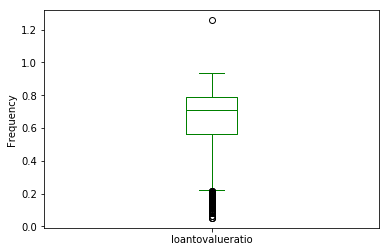

In [29]:
metadata_df['loantovalueratio'].plot.box(color = 'green');plt.ylabel('Frequency')

#### Note: 
Higher frequency around 0.7 to 0.9 means people interested in planning to get mostly 70% to 90% finance from Tic: Toc.

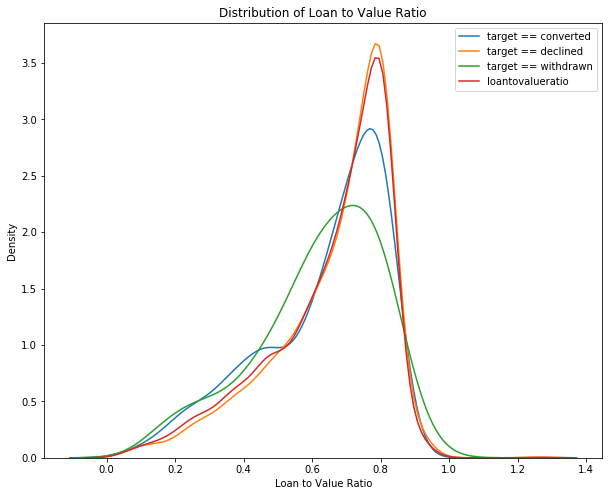

In [30]:
plt.figure(figsize = (10, 8))
# KDE plot of loans applications converted
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'converted', 'loantovalueratio'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'declined', 'loantovalueratio'] , label = 'target == declined')
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'withdrawn', 'loantovalueratio'] , label = 'target == withdrawn')
sns.kdeplot(metadata_df['loantovalueratio'])
# Labeling of plot
plt.xlabel('Loan to Value Ratio'); plt.ylabel('Density'); plt.title('Distribution of Loan to Value Ratio');

#### Note:
Applications with Low loan to value ratios have been converted more than higher loan to value ratios as can be noticed from the above distributions.


Text(0.5,1,'Histogram of Age at the start of Application')

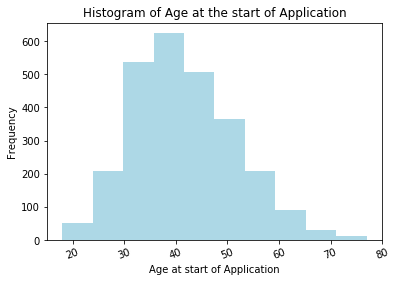

In [31]:
metadata_df['agecreatedon'].plot.hist(color = 'lightblue');plt.xlabel('Age at start of Application');plt.ylabel('Frequency');plt.xticks(rotation = 20);plt.title('Histogram of Age at the start of Application')

#### Note:
    Minimum and maximum age values seem in appropriate range, hence no age outliers present. However, most people started thier first loan applications from early 30's to late 40's.

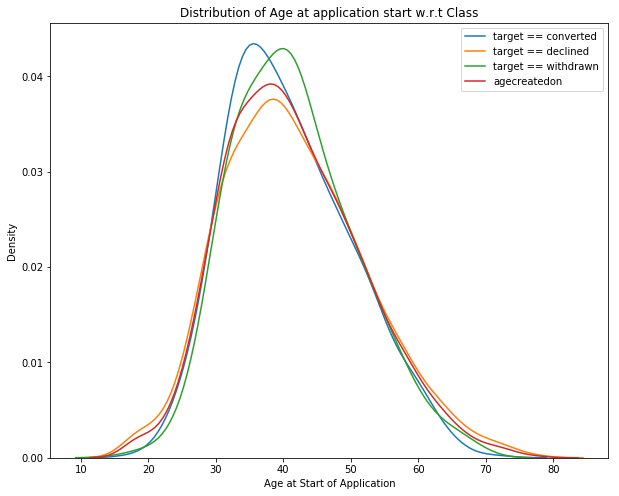

In [32]:
plt.figure(figsize = (10, 8))
# KDE plot of loans applications converted
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'converted', 'agecreatedon'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'declined', 'agecreatedon'] , label = 'target == declined')
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'withdrawn', 'agecreatedon'] , label = 'target == withdrawn')
sns.kdeplot(metadata_df['agecreatedon'])
# Labeling of plot
plt.xlabel('Age at Start of Application'); plt.ylabel('Density'); plt.title('Distribution of Age at application start w.r.t Class');

#### Note: 
People starting their applications from early 30's to early 40's have been approved more than declined for home loans. 


In [33]:
print('Descriptive Stats of categorical attributes in metadata')
metadata_df.select_dtypes(include=['object']).describe()

Descriptive Stats of categorical attributes in metadata


,applicationid,createdon,outcomeon,status,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,applicationtype
count,2633,2633,2633,2633,2633,2633,2633,2633,2633,2625
unique,2584,362,380,3,8,2,2,2,2,2
top,e50f310754c979a8bc55e5ecc7eaa150b7fa09bc549552...,2019-06-17,2019-01-09,declined,VIC,REF,Principal & Interest,livein,variable,JOINT
freq,3,24,20,1788,876,1897,2331,1771,2000,1315


#### Converting Date columns to DateTime Data Type

In [34]:
# Converting Date columns to DateTime Data Type
cols = ['createdon','outcomeon']
metadata_df[cols] = metadata_df[cols].apply(pd.to_datetime)
metadata_df.dtypes.value_counts()


object            8
float64           2
datetime64[ns]    2
int64             1
dtype: int64

#### Appending a new "daystotal" created column above representing total days of Application till final outcome

In [35]:
# Adding Total Days of Application till final outcome
metadata_df['daystotal'] = metadata_df['outcomeon']-metadata_df['createdon']
metadata_df['daystotal'] = metadata_df['daystotal'].dt.days.astype('int16')

In [36]:
# To check the new appended column
metadata_df.head()

,applicationid,createdon,outcomeon,status,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,loanamount,loantovalueratio,applicationtype,agecreatedon,daystotal
0,4b26f9a98e6cf50ef9cb2b6dedf04313eb2c550c1d6bbf...,2019-01-07,2019-01-09,declined,QLD,REF,Principal & Interest,investment,variable,276541,0.8130,SINGLE,43.0,2
1,3bb0d74696a1646d89ddbbeb87e1210945ac74360d71ce...,2019-01-21,2019-01-24,declined,NSW,REF,Principal & Interest,livein,variable,622892,0.7875,SINGLE,26.0,3
2,b5ac586fab6a38bb274012099eae4fcd09531c36123276...,2019-01-23,2019-01-24,declined,SA,REF,Principal & Interest,investment,fixed,248333,0.7845,JOINT,38.0,1
3,78800a684d23719ff98d037bfa395b5a1dfafd654f5560...,2019-01-14,2019-01-16,declined,QLD,REF,Principal & Interest,livein,variable,600808,0.7870,JOINT,38.0,2
4,cbc0d862b1cebf4959caba7f9c6791190887ab0c7bbc74...,2019-01-25,2019-01-25,declined,VIC,REF,Principal & Interest,livein,variable,410466,0.8001,JOINT,58.0,0


#### Exploring the new column statistics

The Descriptive Statistics of Total Days of Application Finalization: 
 count    2633.000000
mean        6.309533
std        10.602745
min         0.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       126.000000
Name: daystotal, dtype: float64


Text(0.5,1,'Distribution of Total Days through the Application Process')

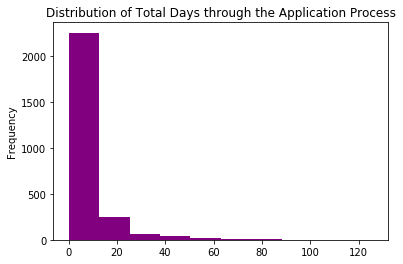

In [37]:
print('The Descriptive Statistics of Total Days of Application Finalization: \n', (metadata_df['daystotal'].describe()))
metadata_df['daystotal'].plot(kind = 'hist', color = 'purple');plt.title('Distribution of Total Days through the Application Process')

#### Note: 
1. The distribution is right skewed.
2. On average, the applications are finalized in 6 days. 


Text(0.5,1,'Distribution of Total Application Days Until Outcome')

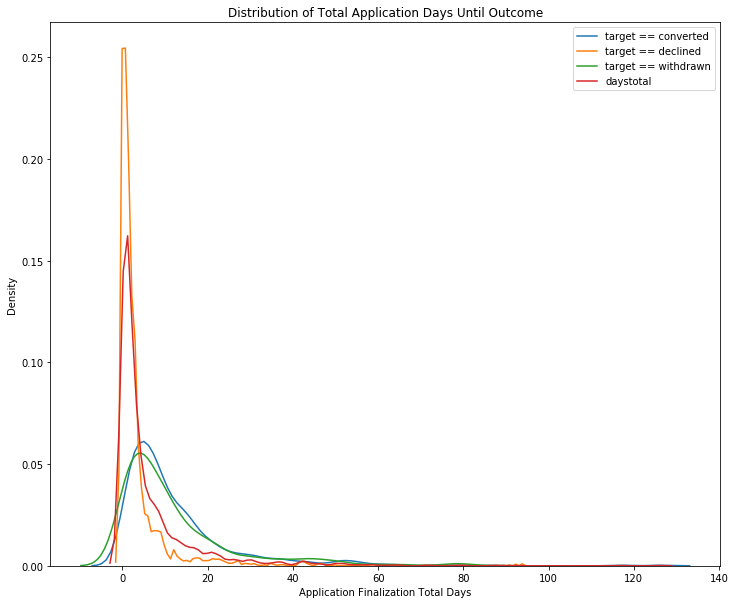

In [38]:

plt.figure(figsize = (12, 10))
# KDE plot of loans applications converted
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'converted', 'daystotal'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'declined', 'daystotal'] , label = 'target == declined')
sns.kdeplot(metadata_df.loc[metadata_df['status'] == 'withdrawn', 'daystotal'] , label = 'target == withdrawn')
sns.kdeplot(metadata_df['daystotal'])
# Labeling of plot
plt.xlabel('Application Finalization Total Days'); plt.ylabel('Density'); plt.title('Distribution of Total Application Days Until Outcome')


#### Note:
1. With increasing no of days after the first week, an application takes for finalization, more applications are converted and withdrawn than declined. 
2. Declined applications are mostly finalized over in the first week as they are the most in number in the first week which can be seen from the distribution above.


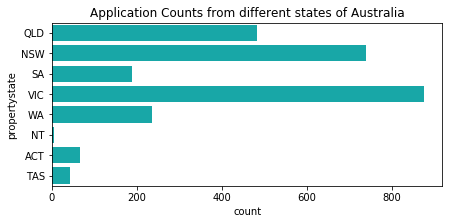

In [39]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="propertystate", data=metadata_df, color="c")
plt.title('Application Counts from different states of Australia');


#### Note:
Most number of applications are received from Victoria and least from Northern Territory.

Text(0.5,1,'Numer of Applications as per their status in all Australian States')

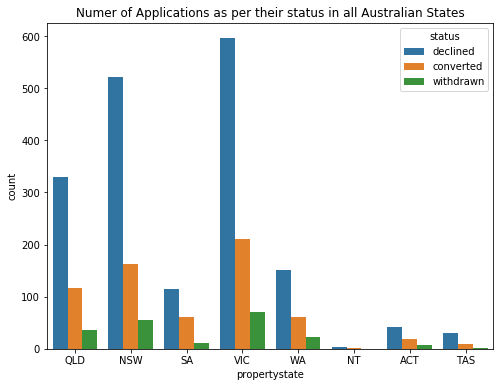

In [40]:
plt.figure(figsize = (8,6))
sns.countplot(x="propertystate", hue="status", data=metadata_df)
plt.title('Numer of Applications as per their status in all Australian States')

#### Note:
The number of approvals, declinations or withdrawls are directly proportional to the number of applications for each state. 

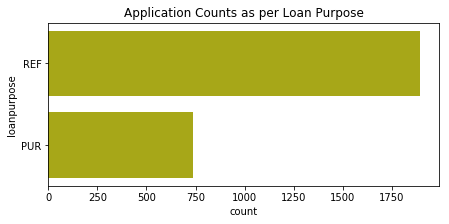

In [41]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="loanpurpose", data=metadata_df, color="y")
plt.title('Application Counts as per Loan Purpose');


#### Note:
It can be clearly seen that more people interested in refinancing than purchasing.

Text(0.5,1,'Numer of Applications as per their Loan Purpose')

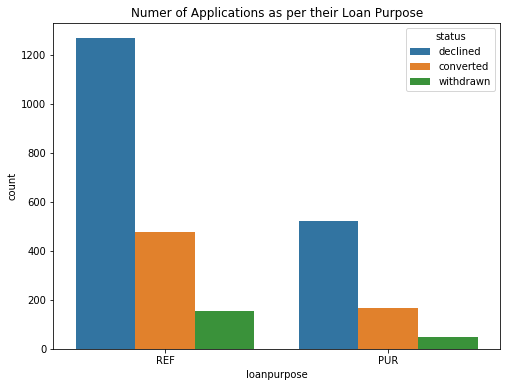

In [42]:
plt.figure(figsize = (8,6))
sns.countplot(x="loanpurpose", hue="status", data=metadata_df)
plt.title('Numer of Applications as per their Loan Purpose')

#### Note:
On both Refinancing and Purchasing behavior; declined applications remain on top followed by converted and withdrawn.

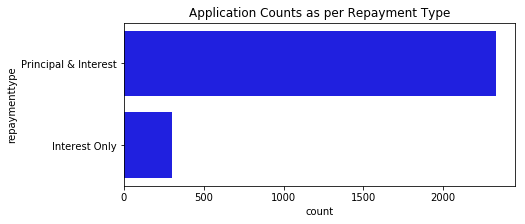

In [43]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="repaymenttype", data=metadata_df, color="b")
plt.title('Application Counts as per Repayment Type');


Text(0.5,1,'Numer of Applications as per their Repayment Type')

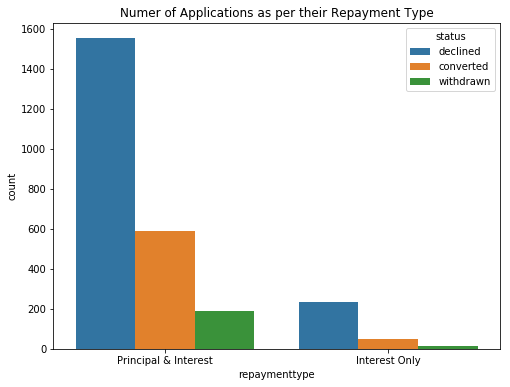

In [44]:
plt.figure(figsize = (8,6))
sns.countplot(x="repaymenttype", hue="status", data=metadata_df)
plt.title('Numer of Applications as per their Repayment Type')

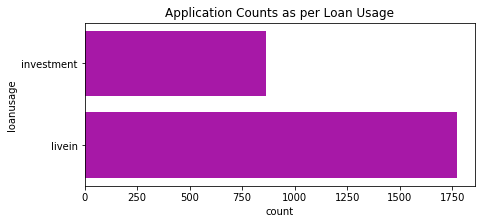

In [45]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="loanusage", data=metadata_df, color="m")
plt.title('Application Counts as per Loan Usage');


Text(0.5,1,'Numer of Applications as per their Loan Usage')

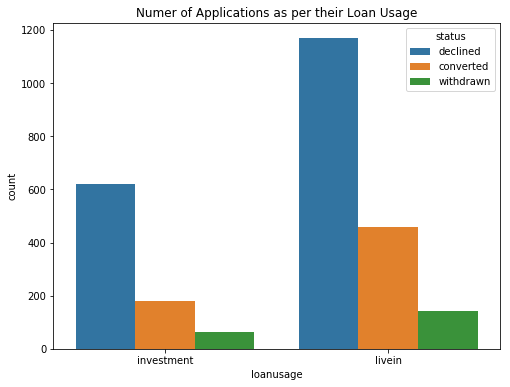

In [46]:
plt.figure(figsize = (8,6))
sns.countplot(x="loanusage", hue="status", data=metadata_df)
plt.title('Numer of Applications as per their Loan Usage')

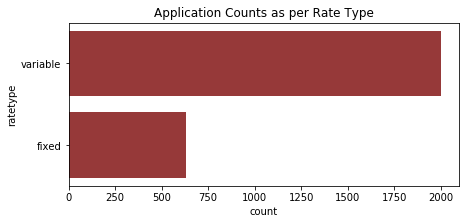

In [47]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="ratetype", data=metadata_df, color="brown")
plt.title('Application Counts as per Rate Type');


Text(0.5,1,'Numer of Applications as per their rate Type')

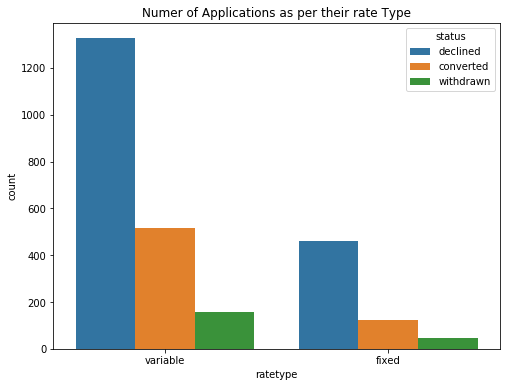

In [48]:
plt.figure(figsize = (8,6))
sns.countplot(x="ratetype", hue="status", data=metadata_df)
plt.title('Numer of Applications as per their rate Type')

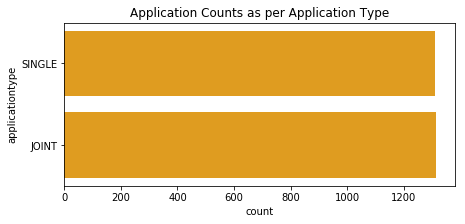

In [49]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="applicationtype", data=metadata_df, color="orange")
plt.title('Application Counts as per Application Type');


#### Note:
Both single and joint application count is equal as can be seen above.

Text(0.5,1,'Numer of Applications as per their Application Type')

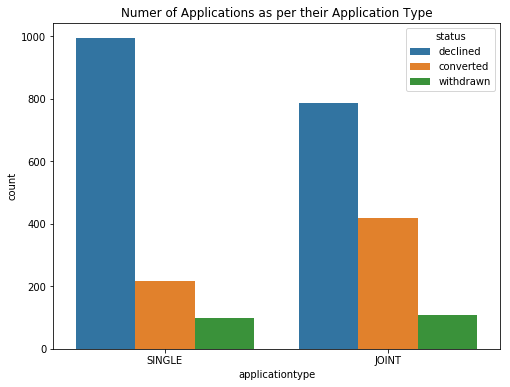

In [50]:
plt.figure(figsize = (8,6))
sns.countplot(x="applicationtype", hue="status", data=metadata_df)
plt.title('Numer of Applications as per their Application Type')

## Chat Data 

### Chat Data merge with Application Metadata based on Application ID

In [51]:
meta_chat_df = pd.merge(metadata_df,chat_df, how = 'inner', on  = 'applicationid')

In [52]:
meta_chat_df.shape

(25638, 22)

In [53]:
meta_chat_df.head()

,applicationid,createdon,outcomeon,status_x,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,loanamount,...,agecreatedon,daystotal,chatEmbedding,chatid,chatstarton,rating,sentiment_compound,status_y,user_type,utteranceid
0,3bb0d74696a1646d89ddbbeb87e1210945ac74360d71ce...,2019-01-21,2019-01-24,declined,NSW,REF,Principal & Interest,livein,variable,622892,...,26.0,3,"[[0.012461126, 0.026670266, 0.0038820878, 0.04...",c6c866f007e60769745ffc786e7f418299ed2ef6f75802...,2019-01-21,not_rated,0.0000,declined,visitor,40d38eaa728e092a503888e3ee3e0f2b7e56346fc84702...
1,3bb0d74696a1646d89ddbbeb87e1210945ac74360d71ce...,2019-01-21,2019-01-24,declined,NSW,REF,Principal & Interest,livein,variable,622892,...,26.0,3,"[[0.04720975, -0.04484099, 0.044976894, -0.022...",c6c866f007e60769745ffc786e7f418299ed2ef6f75802...,2019-01-21,not_rated,0.0000,declined,visitor,0c43da40329ae35b4cf0877f03ed8943785de4d8e7613d...
2,3bb0d74696a1646d89ddbbeb87e1210945ac74360d71ce...,2019-01-21,2019-01-24,declined,NSW,REF,Principal & Interest,livein,variable,622892,...,26.0,3,"[[0.0023857132, 0.02740511, -0.017529666, 0.04...",c6c866f007e60769745ffc786e7f418299ed2ef6f75802...,2019-01-21,not_rated,0.0752,declined,visitor,5703e6442e00b85aceffccbdfcef878bf33128dac781ec...
3,3bb0d74696a1646d89ddbbeb87e1210945ac74360d71ce...,2019-01-21,2019-01-24,declined,NSW,REF,Principal & Interest,livein,variable,622892,...,26.0,3,"[[0.04762963, 0.0016502142, -0.0028040893, -0....",c6c866f007e60769745ffc786e7f418299ed2ef6f75802...,2019-01-21,not_rated,0.6705,declined,visitor,694b9c1a88f849b871a52c280c28d32ed2c1c28abb173d...
4,3bb0d74696a1646d89ddbbeb87e1210945ac74360d71ce...,2019-01-21,2019-01-24,declined,NSW,REF,Principal & Interest,livein,variable,622892,...,26.0,3,"[[-0.043303587, 3.0122697e-05, -0.012399185, -...",c6c866f007e60769745ffc786e7f418299ed2ef6f75802...,2019-01-21,not_rated,0.0000,declined,visitor,fda08a4c1fb5f35defc61fa03f9df3cb779e33c228c583...


The Descriptive Statistics of Sentiment Compound Variable: 
 count    25638.000000
mean         0.180338
std          0.308468
min         -0.961400
25%          0.000000
50%          0.000000
75%          0.421500
max          0.982100
Name: sentiment_compound, dtype: float64


Text(0.5,1,'Distribution of Sentiment Compound')

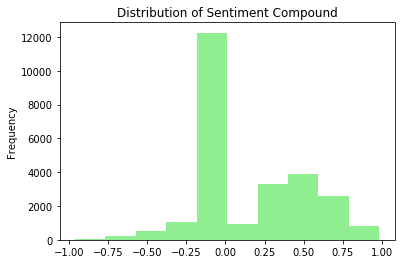

In [54]:
print('The Descriptive Statistics of Sentiment Compound Variable: \n', (meta_chat_df['sentiment_compound'].describe()))
meta_chat_df['sentiment_compound'].plot(kind = 'hist', color = 'lightgreen');plt.title('Distribution of Sentiment Compound')

#### Note:
Mean sentiment compound score is 0.18 (above zero) and more than 50% (1st Quartile - 3rd Quartile) of compound scores for chats lie within 0-0.44. However, from histogram above, the other half of compound scores (11,000 approx and more) lie below zero. Hence 50% chat utterances can be termed as positive and the other half as negative. 
Also, 3000 chat utterances are extremely positive.


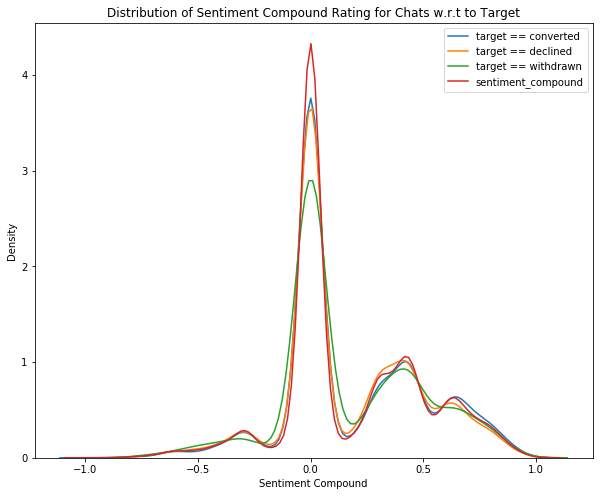

In [55]:
plt.figure(figsize = (10, 8))
# KDE plot of loans applications converted
sns.kdeplot(meta_chat_df.loc[meta_chat_df['status_x'] == 'converted', 'sentiment_compound'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(meta_chat_df.loc[meta_chat_df['status_x'] == 'declined', 'sentiment_compound'] , label = 'target == declined')
sns.kdeplot(meta_chat_df.loc[meta_chat_df['status_x'] == 'withdrawn', 'sentiment_compound'] , label = 'target == withdrawn')
sns.kdeplot(meta_chat_df['sentiment_compound'])
# Labeling of plot
plt.xlabel('Sentiment Compound'); plt.ylabel('Density'); plt.title('Distribution of Sentiment Compound Rating for Chats w.r.t to Target');

#### Note:
It is hard to say from sentiment compound that either customers behaving positively or negatively in chat conversations whether their loans approved or declined as the distributions are almost in line with each other for both approved and declined loan applications.

not_rated     13771
rated_good    11366
rated_bad       501
Name: rating, dtype: int64


Text(0.5,1,'Chat Rating Proportion')

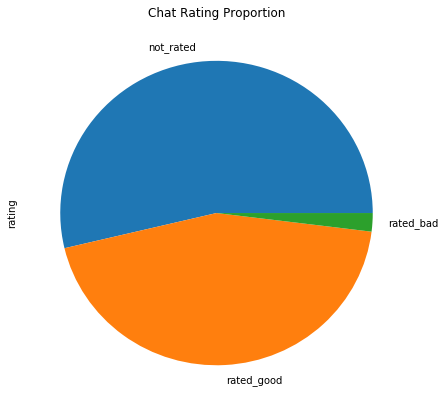

In [56]:
print(meta_chat_df['rating'].value_counts())
plt.figure(figsize=(7,7))
meta_chat_df['rating'].value_counts().plot(kind='pie');plt.title('Chat Rating Proportion')

Text(0.5,1,'Chat Rating as per Status')

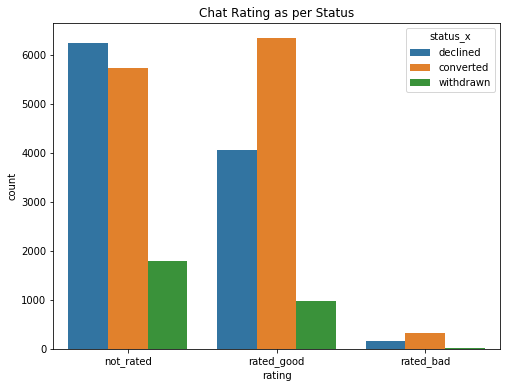

In [57]:
plt.figure(figsize = (8,6))
sns.countplot(x="rating", hue="status_x", data=meta_chat_df)
plt.title('Chat Rating as per Status')

Text(0.5,1,'User Type as per Status')

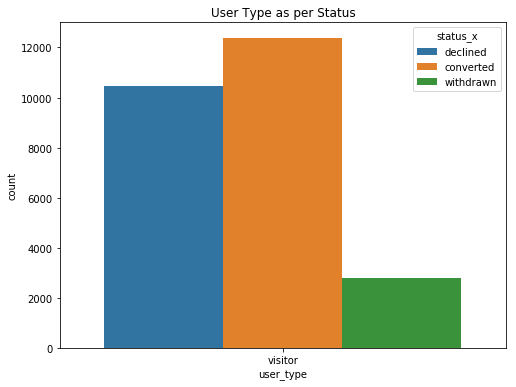

In [58]:
plt.figure(figsize = (8,6))
sns.countplot(x="user_type", hue="status_x", data=meta_chat_df)
plt.title('User Type as per Status')

#### Note:
As only one level of User type is present, hence the plot gives number of unique levels of Target Variable.

In [59]:
meta_chat_df.chatEmbedding.head()

0    [[0.012461126, 0.026670266, 0.0038820878, 0.04...
1    [[0.04720975, -0.04484099, 0.044976894, -0.022...
2    [[0.0023857132, 0.02740511, -0.017529666, 0.04...
3    [[0.04762963, 0.0016502142, -0.0028040893, -0....
4    [[-0.043303587, 3.0122697e-05, -0.012399185, -...
Name: chatEmbedding, dtype: object

## Transaction Data 

In [60]:
print('Descriptive Stats of numeric attributes in transaction data frame')
transaction_df.select_dtypes(exclude=['object']).describe()

Descriptive Stats of numeric attributes in transaction data frame


,transactionamount
count,6.070870e+05
mean,1.885567e+01
std,7.516111e+03
min,-1.185941e+06
25%,-7.999000e+01
50%,-2.000000e+01
75%,-2.500000e+00
max,2.552969e+06


(array([-1500000., -1000000.,  -500000.,        0.,   500000.,  1000000.,
         1500000.,  2000000.,  2500000.,  3000000.]),
 <a list of 10 Text xticklabel objects>)

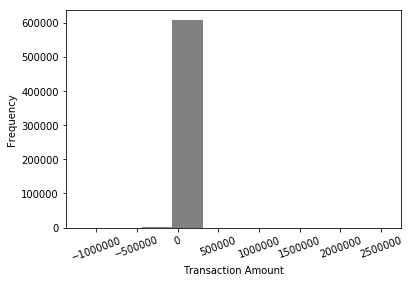

In [61]:
transaction_df['transactionamount'].plot.hist(color = 'gray');plt.xlabel('Transaction Amount');plt.ylabel('Frequency');plt.xticks(rotation = 20)

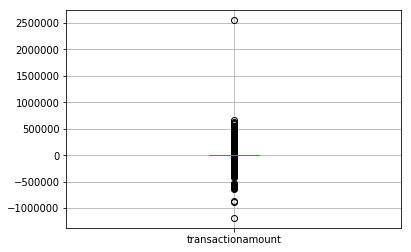

In [62]:
transaction_df.select_dtypes(exclude=['object']).boxplot()

### Note:
Deviating significantly from mean of 18 dollars and being responsible for higher standard deviation of 7500 dollars and almost invisible in histogram above, the transaction amounts surmounting to more than 20 lac dollars seem unrealistic and may subject to outliers in the transaction data. Similarly, also verified from the boxplot above, the credit tranactions below 50,000 dollars also seem unreasonable, hence will be treated as outliers. 

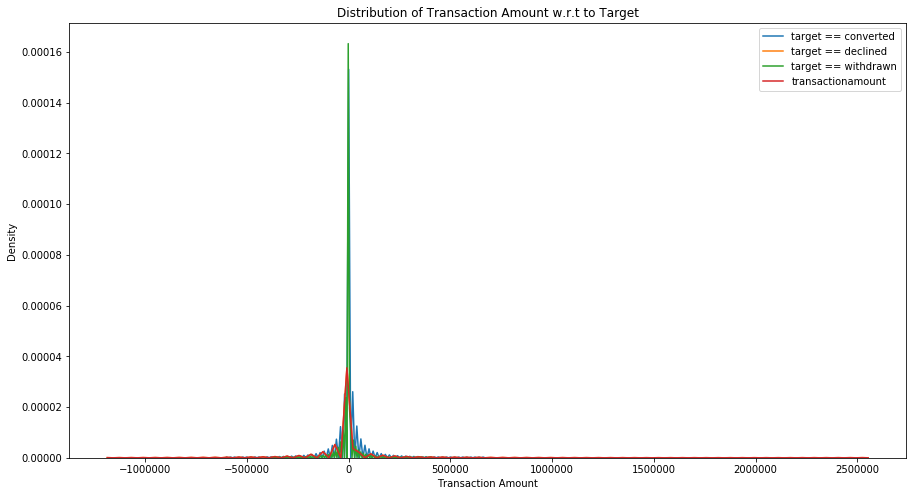

In [63]:
plt.figure(figsize = (15, 8))
# KDE plot of loans applications converted
sns.kdeplot(transaction_df.loc[transaction_df['status'] == 'converted', 'transactionamount'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(transaction_df.loc[transaction_df['status'] == 'declined', 'transactionamount'] , label = 'target == declined')
sns.kdeplot(transaction_df.loc[transaction_df['status'] == 'withdrawn', 'transactionamount'] , label = 'target == withdrawn')
sns.kdeplot(transaction_df['transactionamount'])
# Labeling of plot
plt.xlabel('Transaction Amount'); plt.ylabel('Density'); plt.title('Distribution of Transaction Amount w.r.t to Target');

## Clickstream Data

In [64]:
clickstream_df.head()

,applicationid,createdon,lastsession,firstsession,sessioncount,visitdays,daysjourney,pagepathdistinct,conversionpath
0,9fb1fc0e2cf41ec8a1dd0debd300e9d4fe82f39b8fa083...,2019-01-05,2019-01-05,2019-01-05,4,1,0,Home | Tic:Toc - The World's First Instant Hom...,PaidSearch > Affiliates > Affiliates
1,3d4dbe46d23415a8682751f2ee59817b29d334d360c5ef...,2019-01-09,2019-01-09,2019-01-09,3,1,0,Home | Tic:Toc - The World's First Instant Hom...,Direct > Direct > SaveResume
2,244ad26fe7978ebbc422181342c3af869222e6722a645f...,2018-11-10,2018-11-10,2018-11-09,3,2,1,Home | Tic:Toc - The World's First Instant Hom...,OrganicSearch > OrganicSearch > OrganicSearch ...
3,244ad26fe7978ebbc422181342c3af869222e6722a645f...,2018-11-10,2018-11-10,2018-11-09,3,2,1,Home | Tic:Toc - The World's First Instant Hom...,OrganicSearch > OrganicSearch > OrganicSearch
4,3f780ce0ab43c050d5ba323f91593abf94dab8bec13e80...,2018-11-13,2018-11-13,2018-11-13,1,1,0,Tic:Toc - World's first instant home loan,Direct


## Observing count of Distinct page paths from 50 random samples

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text xticklabel objects>)

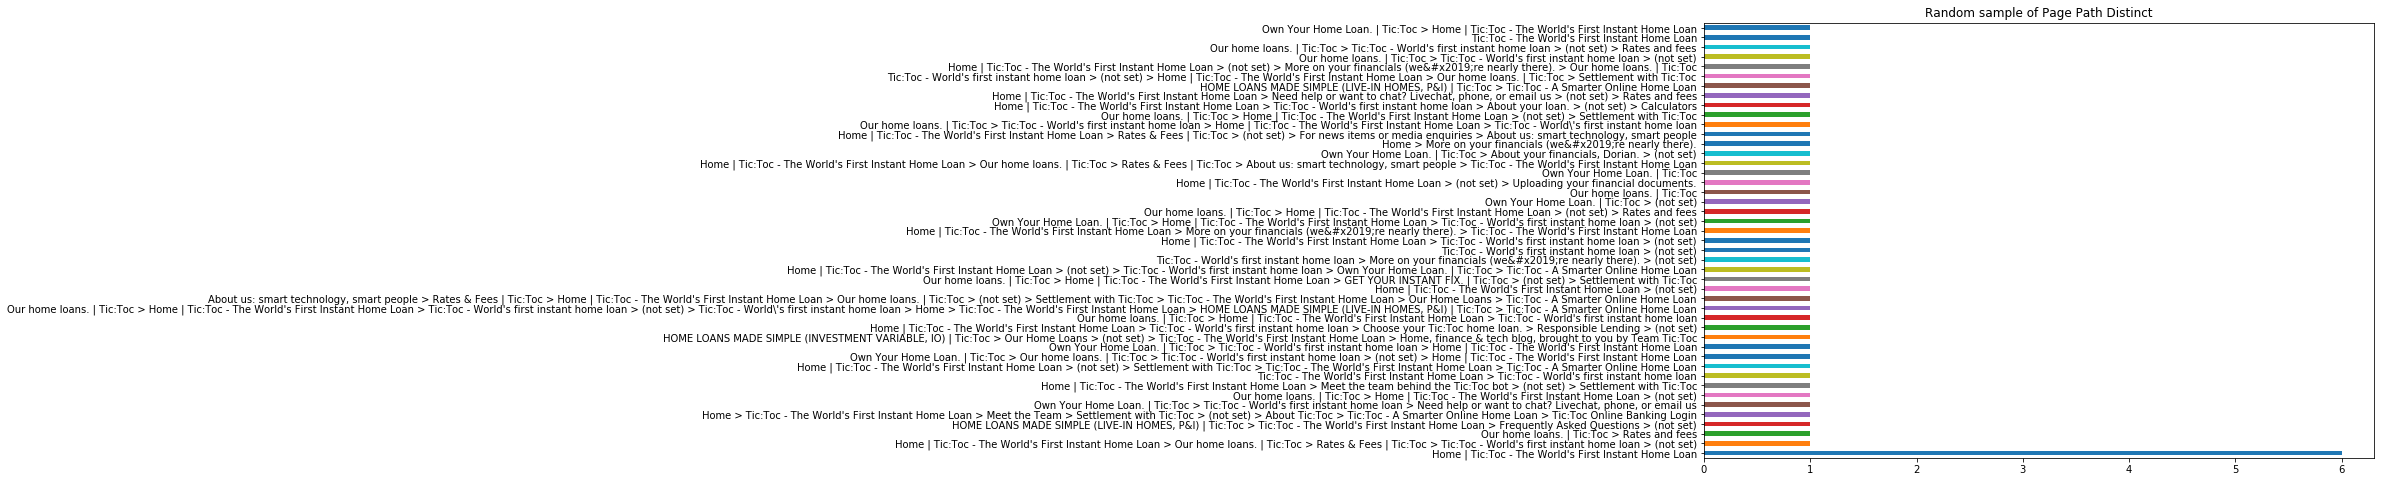

In [65]:
plt.figure(figsize = (12,8))
clickstream_df.pagepathdistinct.sample(50).value_counts().plot(kind='barh');plt.title('Random sample of Page Path Distinct');plt.xticks(rotation = 0)


#### With varying counts each time, Most frequent (Top 3) distinct page paths upon repeated random observation:
1. Home | Tic: Toc - The World's First Instant Home Loan
2. Our home loans | Tic: Toc
3. Tic: Toc - A Smarter Online Home Loan


## Observing count of Conversion Paths from 50 random samples

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

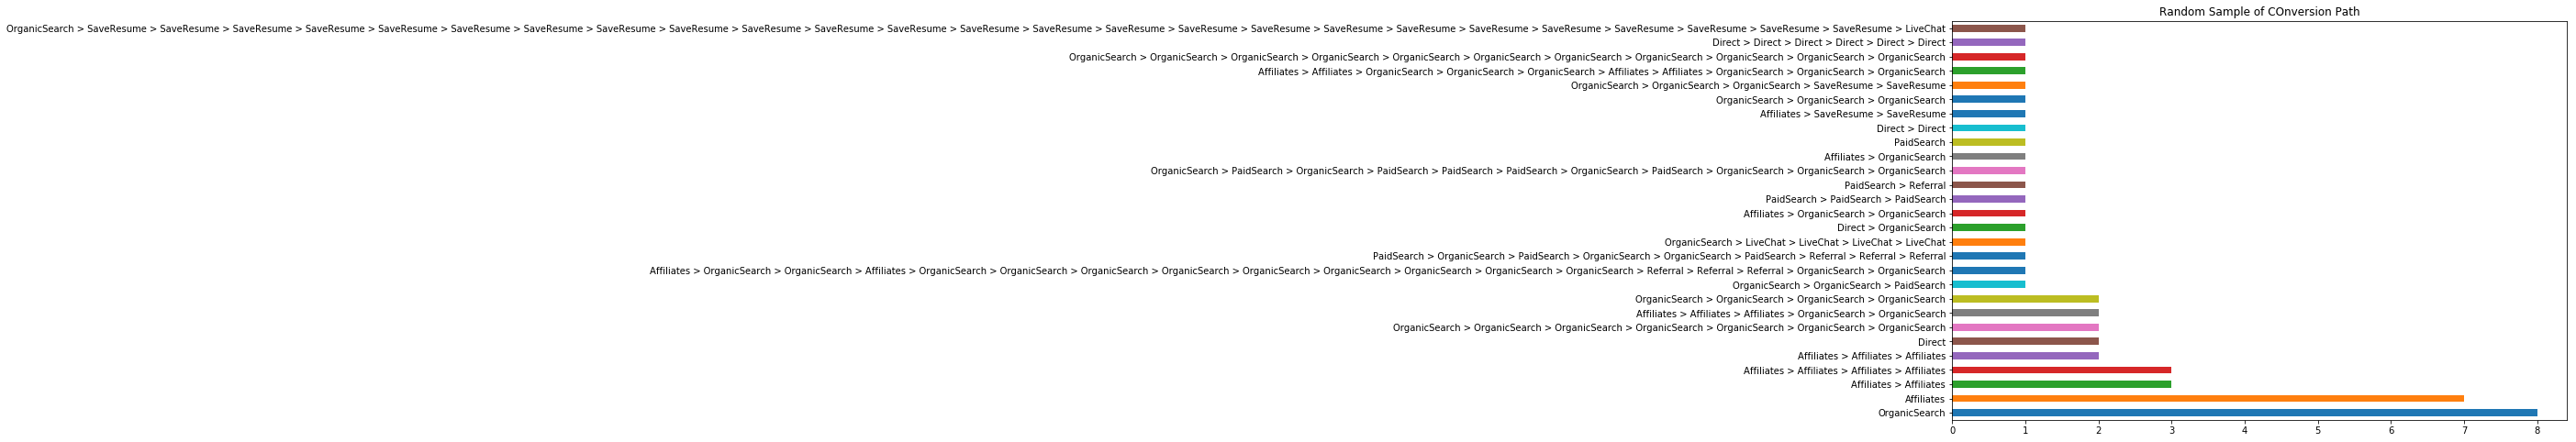

In [66]:
plt.figure(figsize = (12,8))
clickstream_df.conversionpath.sample(50).value_counts().plot(kind='barh');plt.title('Random Sample of COnversion Path');plt.xticks(rotation = 0)


#### With varying counts each time, Most frequent (Top 3) Conversion Paths upon repeated random observation;
1. Organic Search
2. Affiliates
3. Direct
4. Short paths including two or three of the above three paths.

In [67]:
meta_click_df.head()

,applicationid,createdon_x,outcomeon,status,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,loanamount,...,applicationtype,agecreatedon,createdon_y,lastsession,firstsession,sessioncount,visitdays,daysjourney,pagepathdistinct,conversionpath
0,3bb0d74696a1646d89ddbbeb87e1210945ac74360d71ce...,2019-01-21,2019-01-24,declined,NSW,REF,Principal & Interest,livein,variable,622892,...,SINGLE,26.0,2019-01-21,2019-01-21,2019-01-04,4,3,17,Home | Tic:Toc - The World's First Instant Hom...,PaidSearch > PaidSearch > PaidSearch > PaidSearch
1,b5ac586fab6a38bb274012099eae4fcd09531c36123276...,2019-01-23,2019-01-24,declined,SA,REF,Principal & Interest,investment,fixed,248333,...,JOINT,38.0,2019-01-23,2019-01-23,2019-01-23,1,1,0,Our home loans. | Tic:Toc,Affiliates
2,78800a684d23719ff98d037bfa395b5a1dfafd654f5560...,2019-01-14,2019-01-16,declined,QLD,REF,Principal & Interest,livein,variable,600808,...,JOINT,38.0,2019-01-14,2019-01-14,2019-01-14,3,1,0,Our home loans. | Tic:Toc > Responsible Lendin...,Affiliates > Affiliates > Affiliates
3,19920867bde764f5de0784c07b45e72ddd9e2db770146f...,2019-01-24,2019-01-25,declined,VIC,REF,Principal & Interest,investment,variable,152997,...,SINGLE,40.0,2019-01-24,2019-01-24,2019-01-24,3,1,0,Our home loans. | Tic:Toc > Tic:Toc - World's ...,Affiliates > Affiliates > Affiliates
4,19920867bde764f5de0784c07b45e72ddd9e2db770146f...,2019-01-24,2019-01-25,declined,VIC,REF,Principal & Interest,investment,variable,152997,...,SINGLE,40.0,2019-01-24,2019-01-24,2019-01-24,3,1,0,Our home loans. | Tic:Toc > Tic:Toc - World's ...,Affiliates > Affiliates


In [68]:
print('Descriptive Stats of numeric attributes in clickstream')
clickstream_df.select_dtypes(exclude=['object']).describe()

Descriptive Stats of numeric attributes in clickstream


,sessioncount,visitdays,daysjourney
count,2491.000000,2491.000000,2491.000000
mean,3.546367,2.363308,14.012846
std,3.719124,2.419981,40.734529
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000
75%,4.000000,3.000000,7.000000
max,32.000000,28.000000,410.000000


Text(0.5,1,'Distribution of Session Count')

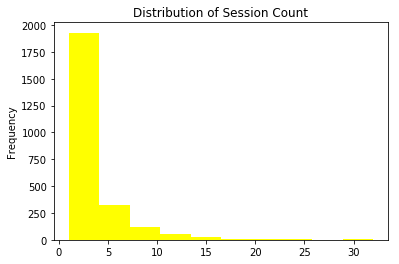

In [69]:
clickstream_df['sessioncount'].plot(kind = 'hist', color = 'yellow');plt.title('Distribution of Session Count')

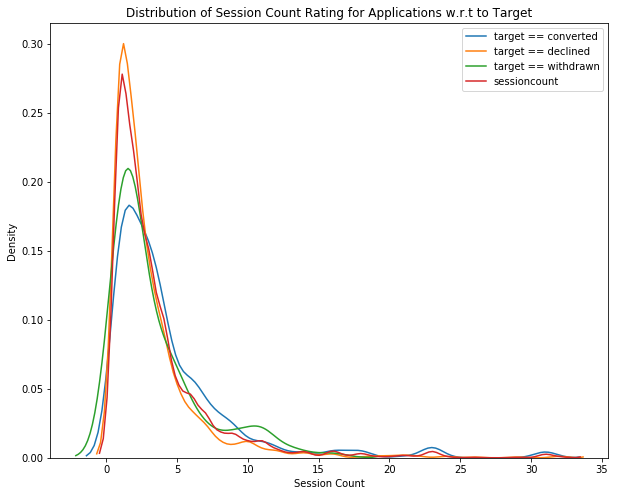

In [70]:
plt.figure(figsize = (10, 8))
# KDE plot of loans applications converted
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'converted', 'sessioncount'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'declined', 'sessioncount'] , label = 'target == declined')
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'withdrawn', 'sessioncount'] , label = 'target == withdrawn')
sns.kdeplot(meta_click_df['sessioncount'])
# Labeling of plot
plt.xlabel('Session Count'); plt.ylabel('Density'); plt.title('Distribution of Session Count Rating for Applications w.r.t to Target');

Text(0.5,1,'Distribution of visitdays')

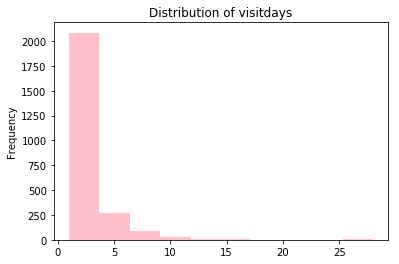

In [71]:
clickstream_df['visitdays'].plot(kind = 'hist', color = 'pink');plt.title('Distribution of visitdays')

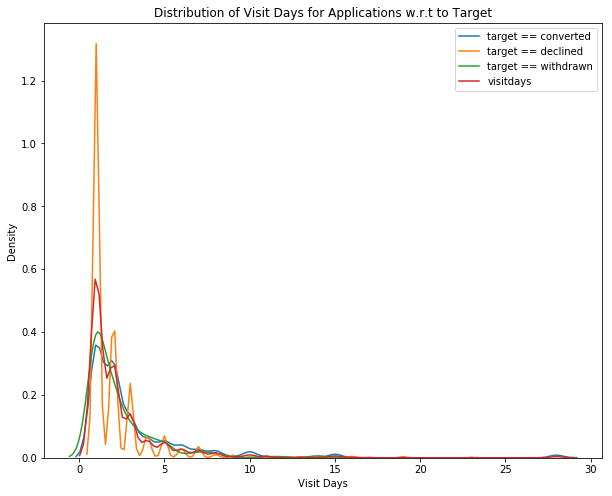

In [72]:
plt.figure(figsize = (10, 8))
# KDE plot of loans applications converted
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'converted', 'visitdays'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'declined', 'visitdays'] , label = 'target == declined')
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'withdrawn', 'visitdays'] , label = 'target == withdrawn')
sns.kdeplot(meta_click_df['visitdays'])
# Labeling of plot
plt.xlabel('Visit Days'); plt.ylabel('Density'); plt.title('Distribution of Visit Days for Applications w.r.t to Target');

Text(0.5,1,'Distribution of Days of Journey')

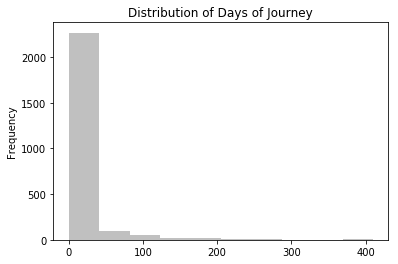

In [73]:
clickstream_df['daysjourney'].plot(kind = 'hist', color = 'silver');plt.title('Distribution of Days of Journey')

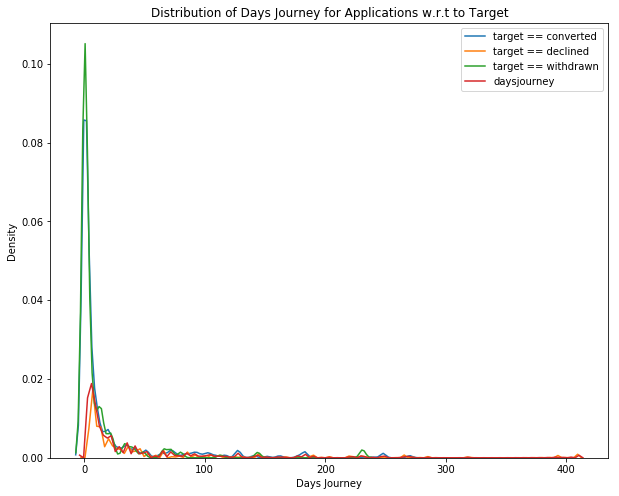

In [74]:
plt.figure(figsize = (10, 8))
# KDE plot of loans applications converted
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'converted', 'daysjourney'] , label = 'target == converted')
# KDE plot of loans applications declined
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'declined', 'daysjourney'] , label = 'target == declined')
sns.kdeplot(meta_click_df.loc[meta_click_df['status'] == 'withdrawn', 'daysjourney'] , label = 'target == withdrawn')
sns.kdeplot(meta_click_df['daysjourney'])
# Labeling of plot
plt.xlabel('Days Journey'); plt.ylabel('Density'); plt.title('Distribution of Days Journey for Applications w.r.t to Target');

## Correlations

In [75]:
All_columns = meta_click_chat_trans_df.columns.values

In [76]:
Categorical_columns = meta_click_chat_trans_df.select_dtypes(include = 'object')

In [77]:
All_categorical_columns = Categorical_columns.columns.values.tolist()

In [78]:
cols_to_transform = [e for e in All_categorical_columns if e not in ('applicationid', 'status_x', 'createdon_y', 'pagepathdistinct', 'conversionpath', 'chatEmbedding', 'chatid', 'status_y', 'user_type', 'utteranceid', 'accountid', 'transactionEmbedding', 'transactionposteddate', 'txnid')]

In [79]:
(cols_to_transform)

['createdon_x',
 'outcomeon',
 'propertystate',
 'loanpurpose',
 'repaymenttype',
 'loanusage',
 'ratetype',
 'applicationtype',
 'lastsession',
 'firstsession',
 'chatstarton',
 'rating',
 'financialinstitution',
 'status',
 'transactioncategory']

In [80]:
cols_to_transform1 = [e for e in All_categorical_columns if e in ('status')]

In [81]:

df_with_dummies1 = pd.get_dummies(meta_click_chat_trans_df, columns = cols_to_transform1 )

In [82]:
df_with_dummies1.shape

(6718080, 39)

In [83]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = metadata_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,loanamount,loantovalueratio,agecreatedon,daystotal
loanamount,1,0.307783,-0.00873322,-0.0366779
loantovalueratio,0.307783,1,-0.266022,-0.0320327
agecreatedon,-0.00873322,-0.266022,1,0.0295587
daystotal,-0.0366779,-0.0320327,0.0295587,1


In [84]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = clickstream_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,sessioncount,visitdays,daysjourney
sessioncount,1,0.899244,0.45503
visitdays,0.899244,1,0.479435
daysjourney,0.45503,0.479435,1


In [85]:
meta_click_chat_trans_df.corr()

,loanamount,loantovalueratio,agecreatedon,sessioncount,visitdays,daysjourney,sentiment_compound,transactionamount
loanamount,1.000000,0.429085,-0.086842,-0.072164,-0.010314,-0.077757,0.051874,-0.000004
loantovalueratio,0.429085,1.000000,-0.318711,-0.266103,-0.173263,-0.218859,0.043207,-0.000047
agecreatedon,-0.086842,-0.318711,1.000000,0.167342,0.089478,0.093668,0.009038,-0.001577
sessioncount,-0.072164,-0.266103,0.167342,1.000000,0.862923,0.698128,0.009038,-0.000382
visitdays,-0.010314,-0.173263,0.089478,0.862923,1.000000,0.548408,0.023138,-0.000098
daysjourney,-0.077757,-0.218859,0.093668,0.698128,0.548408,1.000000,0.009201,-0.000906
sentiment_compound,0.051874,0.043207,0.009038,0.009038,0.023138,0.009201,1.000000,0.000602
transactionamount,-0.000004,-0.000047,-0.001577,-0.000382,-0.000098,-0.000906,0.000602,1.000000


In [86]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = meta_click_chat_trans_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,loanamount,loantovalueratio,agecreatedon,sessioncount,visitdays,daysjourney,sentiment_compound,transactionamount
loanamount,1,0.429085,-0.0868421,-0.072164,-0.010314,-0.0777566,0.0518744,-4.29847e-06
loantovalueratio,0.429085,1,-0.318711,-0.266103,-0.173263,-0.218859,0.0432074,-4.69767e-05
agecreatedon,-0.0868421,-0.318711,1,0.167342,0.0894776,0.0936681,0.00903765,-0.00157745
sessioncount,-0.072164,-0.266103,0.167342,1,0.862923,0.698128,0.00903833,-0.000382234
visitdays,-0.010314,-0.173263,0.0894776,0.862923,1,0.548408,0.0231384,-9.77477e-05
daysjourney,-0.0777566,-0.218859,0.0936681,0.698128,0.548408,1,0.00920101,-0.000906081
sentiment_compound,0.0518744,0.0432074,0.00903765,0.00903833,0.0231384,0.00920101,1,0.000601743
transactionamount,-4.29847e-06,-4.69767e-05,-0.00157745,-0.000382234,-9.77477e-05,-0.000906081,0.000601743,1
